## Imports

In [357]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [358]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [359]:
random.seed(30)

## Part I: Exercises

### Exercise 1

In [360]:
dist_matrix = [0.3, 0.4, 0.7, 0.5, 0.8, 0.45]
labels = [1, 2, 3, 4]

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, np.float64(0.3), np.float64(0.3), 0.0],
  [0.0, np.float64(0.45), np.float64(0.45), 0.0],
  [np.float64(0.3), np.float64(0.8), np.float64(0.8), np.float64(0.45)]],
 'ivl': [1, 2, 3, 4],
 'leaves': [0, 1, 2, 3],
 'color_list': ['C1', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C2', 'C2']}

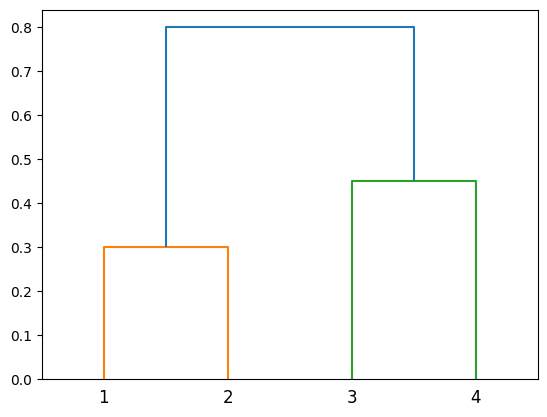

In [361]:
# Complete linkage

complete_link = linkage(dist_matrix, "complete")
dendrogram(complete_link, labels=labels)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5]],
 'dcoord': [[0.0, np.float64(0.3), np.float64(0.3), 0.0],
  [0.0, np.float64(0.4), np.float64(0.4), np.float64(0.3)],
  [0.0, np.float64(0.45), np.float64(0.45), np.float64(0.4)]],
 'ivl': [4, 3, 1, 2],
 'leaves': [3, 2, 0, 1],
 'color_list': ['C1', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C1', 'C1']}

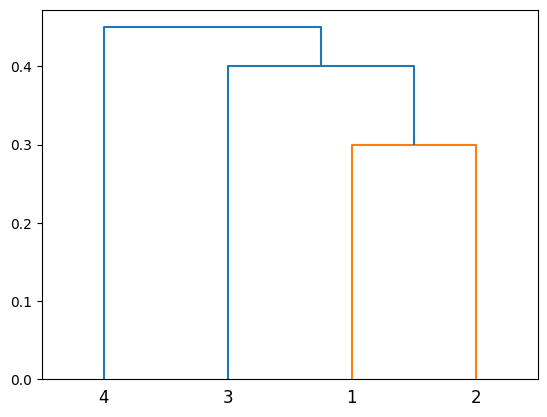

In [362]:
# Single linkage

single_link = linkage(dist_matrix, "single")
dendrogram(single_link, labels=labels)

In [363]:
print(cut_tree(complete_link, n_clusters=2))

[[0]
 [0]
 [1]
 [1]]


In [364]:
print(cut_tree(single_link, n_clusters=2))

[[0]
 [0]
 [0]
 [1]]


### Exercise 2

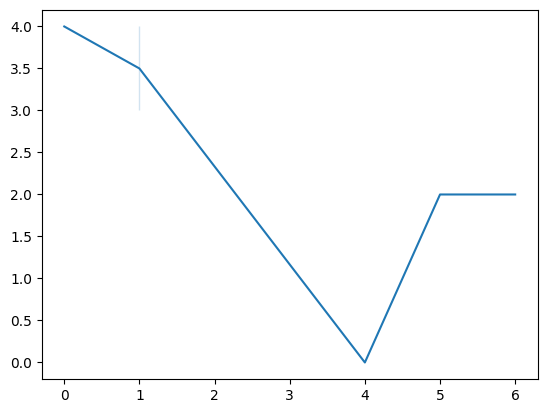

In [365]:
observations = [[1, 1, 0, 5, 6, 4], [4, 3, 4, 2, 2, 0]]
df = pd.DataFrame(observations).T
df.columns = ["x1", "x2"]

sns.lineplot(x=observations[0], y=observations[1])
plt.show()

In [366]:
df.head()

,x1,x2
0,1,4
1,1,3
2,0,4
3,5,2
4,6,2


#### Clustering

In [367]:
label = [1, 2]
labelled_observations = [random.choice(label) for _ in range(len(observations[0]))]

print(labelled_observations)

[2, 1, 1, 2, 1, 2]


In [368]:
df["label"] = labelled_observations

In [369]:
def compute_centroids(df: pd.DataFrame) -> tuple[list[int], list[int]]:
    centroid1 = df[df["label"] == 1][["x1", "x2"]].mean().tolist()
    centroid2 = df[df["label"] != 1][["x1", "x2"]].mean().tolist()

    return centroid1, centroid2

In [370]:
c1, c2 = compute_centroids(df)

print(c1, c2)

[2.3333333333333335, 3.0] [3.3333333333333335, 2.0]


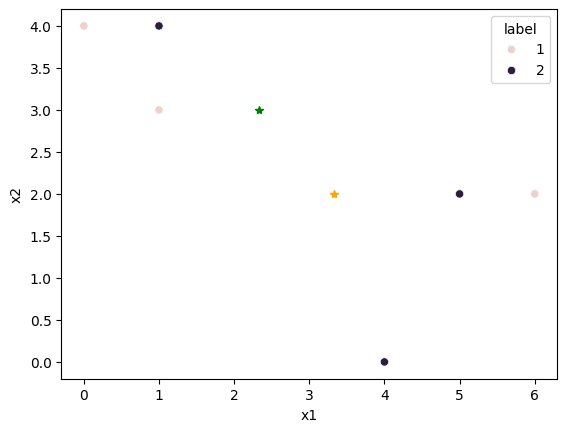

In [371]:
plt.plot(c1[0], c1[1], "*", color="green")
plt.plot(c2[0], c2[1], "*", color="orange")
sns.scatterplot(data=df, x="x1", y="x2", hue="label")
plt.show()

## Part II: Practical Applications

### K-means Clustering

### Hierarchical Clustering